In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(
    style = 'darkgrid',
    #  notebook, paper, talk, poster
    context = 'paper',
    # deep, muted, bright, pastel, dark, colorblind
    palette = 'muted',
    color_codes = True,
    font = 'serif',
    rc = {
        'axes.labelpad': 10,
        'savefig.bbox': 'tight',
        'figure.autolayout': True,
        'figure.figsize': (4.5, 3.6),
        'font.family': ['serif'],
        'font.size': 11,
        'axes.titlesize': 'large',
        'axes.labelsize': 'medium',
        'xtick.labelsize': 'small',
        'ytick.labelsize': 'small',
        # 'text.usetex': True,
        # 'pgf.rcfonts': False,
        'pgf.preamble':  r"""
            \usepackage[brazilian]{babel}
            \usepackage[T1]{fontenc}
            \usepackage[utf8]{inputenc}
        """,
    },
)

def read_df(filename):
    mixed = pd.read_csv(filename, na_values=[' ' * n for n in range(50)], dtype={'psoIter': 'Int64'})
    for col in mixed.columns:
        try:
            mixed[col] = mixed[col].str.strip()
        except:
            pass

    mixed["score"] = (mixed["size"] - mixed["blocks"]) / (mixed["size"] - 1)
    # mixed["exact"] = mixed["exact"] == "Y"
    return mixed

def read_pso_df(filename):
    df = read_df(filename)
    return df[df["heuristic"] == "pso"]

df = read_df('pso-combine-r-5-10-s-5-30-n80.csv')
df.head(20)


,size,repeats,singles,maxRepeat,edges,psoIter,heuristic,blocks,score,time,left,right,pair
0,29,4,17,4,4,<NA>,combine,27,0.071429,0.000,"[18,19 1 2,15,0,5,9,8,20,0,17,1,3,2,12,7,10,3,...","[9,2,11,10,7,21,20,2,5,1,0,16,3,18,0,19 1 2,13...",(18 19 1 2 15 0 5 9 8 20 0 17 1 3 2 12 7 10 3 ...
1,29,4,17,4,4,<NA>,combineS,27,0.071429,0.000,"[18,19 1 2,15,0,5,9,8,20,0,17,1,3,2,12,7,10,3,...","[9,2,11,10,7,21,20,2,5,1,0,16,3,18,0,19 1 2,13...",(18 19 1 2 15 0 5 9 8 20 0 17 1 3 2 12 7 10 3 ...
2,29,4,17,4,4,<NA>,greedy,27,0.071429,0.002,"[18,19 1 2,15,0,5,9,8,20,0,17,1,3,2,12,7,10,3,...","[9,2,11,10,7,21,20,2,5,1,0,16,3,18,0,19 1 2,13...",(18 19 1 2 15 0 5 9 8 20 0 17 1 3 2 12 7 10 3 ...
3,29,4,17,4,4,0,pso,27,0.071429,0.123,"[18,19 1 2,15,0,5,9,8,20,0,17,1,3,2,12,7,10,3,...","[9,2,11,10,7,21,20,2,5,1,0,16,3,18,0,19 1 2,13...",(18 19 1 2 15 0 5 9 8 20 0 17 1 3 2 12 7 10 3 ...
4,29,4,17,4,4,0,psoPure,27,0.071429,0.121,"[18,19 1 2,15,0,5,9,8,20,0,17,1,3,2,12,7,10,3,...","[9,2,11,10,7,21,20,2,5,1,0,16,3,18,0,19 1 2,13...",(18 19 1 2 15 0 5 9 8 20 0 17 1 3 2 12 7 10 3 ...
5,29,4,17,4,4,0,psoCombS,27,0.071429,2.217,"[18,19 1 2,15,0,5,9,8,20,0,17,1,3,2,12,7,10,3,...","[9,2,11,10,7,21,20,2,5,1,0,16,3,18,0,19 1 2,13...",(18 19 1 2 15 0 5 9 8 20 0 17 1 3 2 12 7 10 3 ...
6,52,7,30,5,2,<NA>,combine,50,0.039216,0.000,"[19,24,5,27,34,6 16,6,30,3,14,28,7,10,29,11,0,...","[5,7,0,35,4,6,36,27,33,24,18,38,13,25,37,7,19,...",(19 24 5 27 34 6 16 6 30 3 14 28 7 10 29 11 0 ...
7,52,7,30,5,2,<NA>,combineS,50,0.039216,0.001,"[19,24,5,27,34,6 16,6,30,3,14,28,7,10,29,11,0,...","[5,7,0,35,4,6,36,27,33,24,18,38,13,25,37,7,19,...",(19 24 5 27 34 6 16 6 30 3 14 28 7 10 29 11 0 ...
8,52,7,30,5,2,<NA>,greedy,50,0.039216,0.007,"[19,24,5,27,34,6 16,6,30,3,14,28,7,10,29,11,0,...","[5,7,0,35,4,6,36,27,33,24,18,38,13,25,37,7,19,...",(19 24 5 27 34 6 16 6 30 3 14 28 7 10 29 11 0 ...
9,52,7,30,5,2,0,pso,50,0.039216,0.072,"[19,24,5,27,34,6 16,6,30,3,14,28,7,10,29,11,0,...","[5,7,0,35,4,6,36,27,33,24,18,38,13,25,37,7,19,...",(19 24 5 27 34 6 16 6 30 3 14 28 7 10 29 11 0 ...


In [15]:
df[['blocks', 'score', 'time', 'heuristic']].groupby('heuristic').describe()

blocks                                                     score  \
            count    mean        std   min    25%   50%   75%   max   count   
heuristic                                                                     
combine    1000.0  45.543  11.677693  12.0  37.75  46.0  54.0  71.0  1000.0   
combineS   1000.0  45.431  11.655174  12.0  37.75  46.0  54.0  71.0  1000.0   
greedy     1000.0  45.222  11.619713  12.0  37.00  46.0  54.0  70.0  1000.0   
pso        1000.0  44.705  11.485900  11.0  36.00  45.0  53.0  70.0  1000.0   
psoCombS   1000.0  44.690  11.486420  11.0  36.00  45.0  53.0  70.0  1000.0   
psoPure    1000.0  44.720  11.482484  11.0  36.00  45.0  53.0  70.0  1000.0   

                     ...                        time                        \
               mean  ...       75%       max   count       mean        std   
heuristic            ...                                                     
combine    0.175929  ...  0.229252  0.453125  1000.0   0.000769   0.000564   
combineS   0.177897  ...  0.233511  0.453125  1000.0   0.001528   0.001011   
greedy     0.181213  ...  0.239207  0.468750  1000.0   0.015979   0.010942   
pso        0.189749  ...  0.250000  0.484375  1000.0   7.105806  10.004756   
psoCombS   0.189959  ...  0.250000  0.484375  1000.0  20.898802  14.268067   
psoPure    0.189525  ...  0.250000  0.468750  1000.0   7.096208  10.025154   

                                                      
             min       25%      50%      75%     max  
heuristic                                             
combine    0.000   0.00000   0.0010   0.0010   0.003  
combineS   0.000   0.00100   0.0010   0.0020   0.010  
greedy     0.000   0.00700   0.0140   0.0230   0.070  
pso        0.023   1.16875   3.0995   8.7695  81.836  
psoCombS   1.197  10.28725  17.3025  28.6525  98.999  
psoPure    0.025   1.16225   3.0760   8.6315  80.060  

[6 rows x 24 columns]

In [14]:
N = 6

df_better = df.copy()

select = []
for i in range(len(df) // N):
    assert df_better['heuristic'][N * i + N - 1] == "psoCombS", df_better['heuristic'][N * i + N - 1]
    if df_better['blocks'][N * i + N - 1] > df_better['blocks'][N * i + N - 3]:
        select.extend([N * i + k for k in range(N)])

df_better = df_better.iloc[select]
df_better[(df_better['heuristic'] == 'pso') | (df_better['heuristic'] == 'psoCombS')]


,size,repeats,singles,maxRepeat,edges,psoIter,heuristic,blocks,score,time,left,right,pair
5487,64,5,11,17,112,51,pso,39,0.396825,35.13,"[3 3,9,1 0,0,14 1,3 0 1 1,13,1 4,3 2,3,8,10 3,...","[13,3 1,7,4 3,2 3,0 3,0,4 0,3,0 1,4,10 3,3,1 0...",(3 3 9 1 0 0 14 1 3 0 1 1 13 1 4 3 2 3 8 10 3 ...
5489,64,5,11,17,112,1,psoCombS,40,0.380952,48.97,"[3 3,9 1,0,0,14 1,3 0 1 1,13,1,4 3 2 3,8,10,3,...","[13,3,1,7,4 3 2 3,0,3,0,4 0,3,0 1,4,10,3 3 1,0...",(3 3 9 1 0 0 14 1 3 0 1 1 13 1 4 3 2 3 8 10 3 ...


In [8]:
N = 6

def diff_pso(column: pd.Series, *, selected: int = N - 3):
    rest = [i for i in range(N) if i != selected]
    match column.name:
        case 'heuristic':
            column.iat[selected] = 'best'
            return column
        case 'blocks':
            column = column - column.iat[selected]
            column.iat[selected] = column.iloc[rest].min()
            return column
        case 'score':
            column = column - column.iat[selected]
            column.iat[selected] = column.iloc[rest].max()
            return column
        case 'time':
            column = column - column.iat[selected]
            column.iat[selected] = column.iloc[rest].min()
            return column
        case _:
            return column

pso_diff = df.groupby('pair').transform(diff_pso, selected=3)
pso_diff = pso_diff[pso_diff["heuristic"] != "best"]
pso_diff.head(10)


,size,repeats,singles,maxRepeat,edges,psoIter,heuristic,blocks,score,time,left,right
0,29,4,17,4,4,<NA>,combine,0,0.0,-0.123,"[18,19 1 2,15,0,5,9,8,20,0,17,1,3,2,12,7,10,3,...","[9,2,11,10,7,21,20,2,5,1,0,16,3,18,0,19 1 2,13..."
1,29,4,17,4,4,<NA>,combineS,0,0.0,-0.123,"[18,19 1 2,15,0,5,9,8,20,0,17,1,3,2,12,7,10,3,...","[9,2,11,10,7,21,20,2,5,1,0,16,3,18,0,19 1 2,13..."
2,29,4,17,4,4,<NA>,greedy,0,0.0,-0.121,"[18,19 1 2,15,0,5,9,8,20,0,17,1,3,2,12,7,10,3,...","[9,2,11,10,7,21,20,2,5,1,0,16,3,18,0,19 1 2,13..."
4,29,4,17,4,4,0,psoPure,0,0.0,-0.002,"[18,19 1 2,15,0,5,9,8,20,0,17,1,3,2,12,7,10,3,...","[9,2,11,10,7,21,20,2,5,1,0,16,3,18,0,19 1 2,13..."
5,29,4,17,4,4,0,psoCombS,0,0.0,2.094,"[18,19 1 2,15,0,5,9,8,20,0,17,1,3,2,12,7,10,3,...","[9,2,11,10,7,21,20,2,5,1,0,16,3,18,0,19 1 2,13..."
6,52,7,30,5,2,<NA>,combine,0,0.0,-0.072,"[19,24,5,27,34,6 16,6,30,3,14,28,7,10,29,11,0,...","[5,7,0,35,4,6,36,27,33,24,18,38,13,25,37,7,19,..."
7,52,7,30,5,2,<NA>,combineS,0,0.0,-0.071,"[19,24,5,27,34,6 16,6,30,3,14,28,7,10,29,11,0,...","[5,7,0,35,4,6,36,27,33,24,18,38,13,25,37,7,19,..."
8,52,7,30,5,2,<NA>,greedy,0,0.0,-0.065,"[19,24,5,27,34,6 16,6,30,3,14,28,7,10,29,11,0,...","[5,7,0,35,4,6,36,27,33,24,18,38,13,25,37,7,19,..."
10,52,7,30,5,2,0,psoPure,0,0.0,-0.007,"[19,24,5,27,34,6 16,6,30,3,14,28,7,10,29,11,0,...","[5,7,0,35,4,6,36,27,33,24,18,38,13,25,37,7,19,..."
11,52,7,30,5,2,0,psoCombS,0,0.0,5.801,"[19,24,5,27,34,6 16,6,30,3,14,28,7,10,29,11,0,...","[5,7,0,35,4,6,36,27,33,24,18,38,13,25,37,7,19,..."


<Axes: xlabel='blocks', ylabel='Count'>

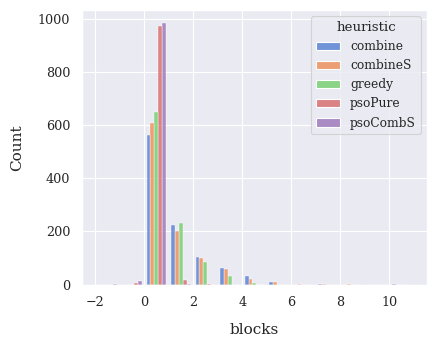

In [11]:
sns.histplot(pso_diff, x="blocks", hue="heuristic", multiple="dodge", binwidth=1, shrink=0.8)
